# Figure 3 & S3

This notebooks is used for reproducing Figure 3 and S3 from Yang\*, Jones\* et al, _bioRxiv_ 2021.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

In [6]:
import matplotlib as mpl
params = {
    'font.family': "Helvetica",
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
mpl.rc('savefig', dpi=300)

In [25]:
data_directory = "/path/to/KPTracer-Data"

adata = sc.read_h5ad(f"{data_directory}/expression/adata_processed.nt.h5ad")

sigscores = pd.read_csv(f"../Figure6_S6/data/fitness_signature_scores.tsv", sep='\t', index_col = 0, usecols=['FitnessSignature_NT'])

In [27]:
kii = np.intersect1d(sigscores.index, adata.obs_names)
adata.obs['FitnessSignature'] = np.nan
adata.obs.loc[kii, 'FitnessSignature'] = sigscores.loc[kii, 'FitnessSignature_NT']

## Figure 3A

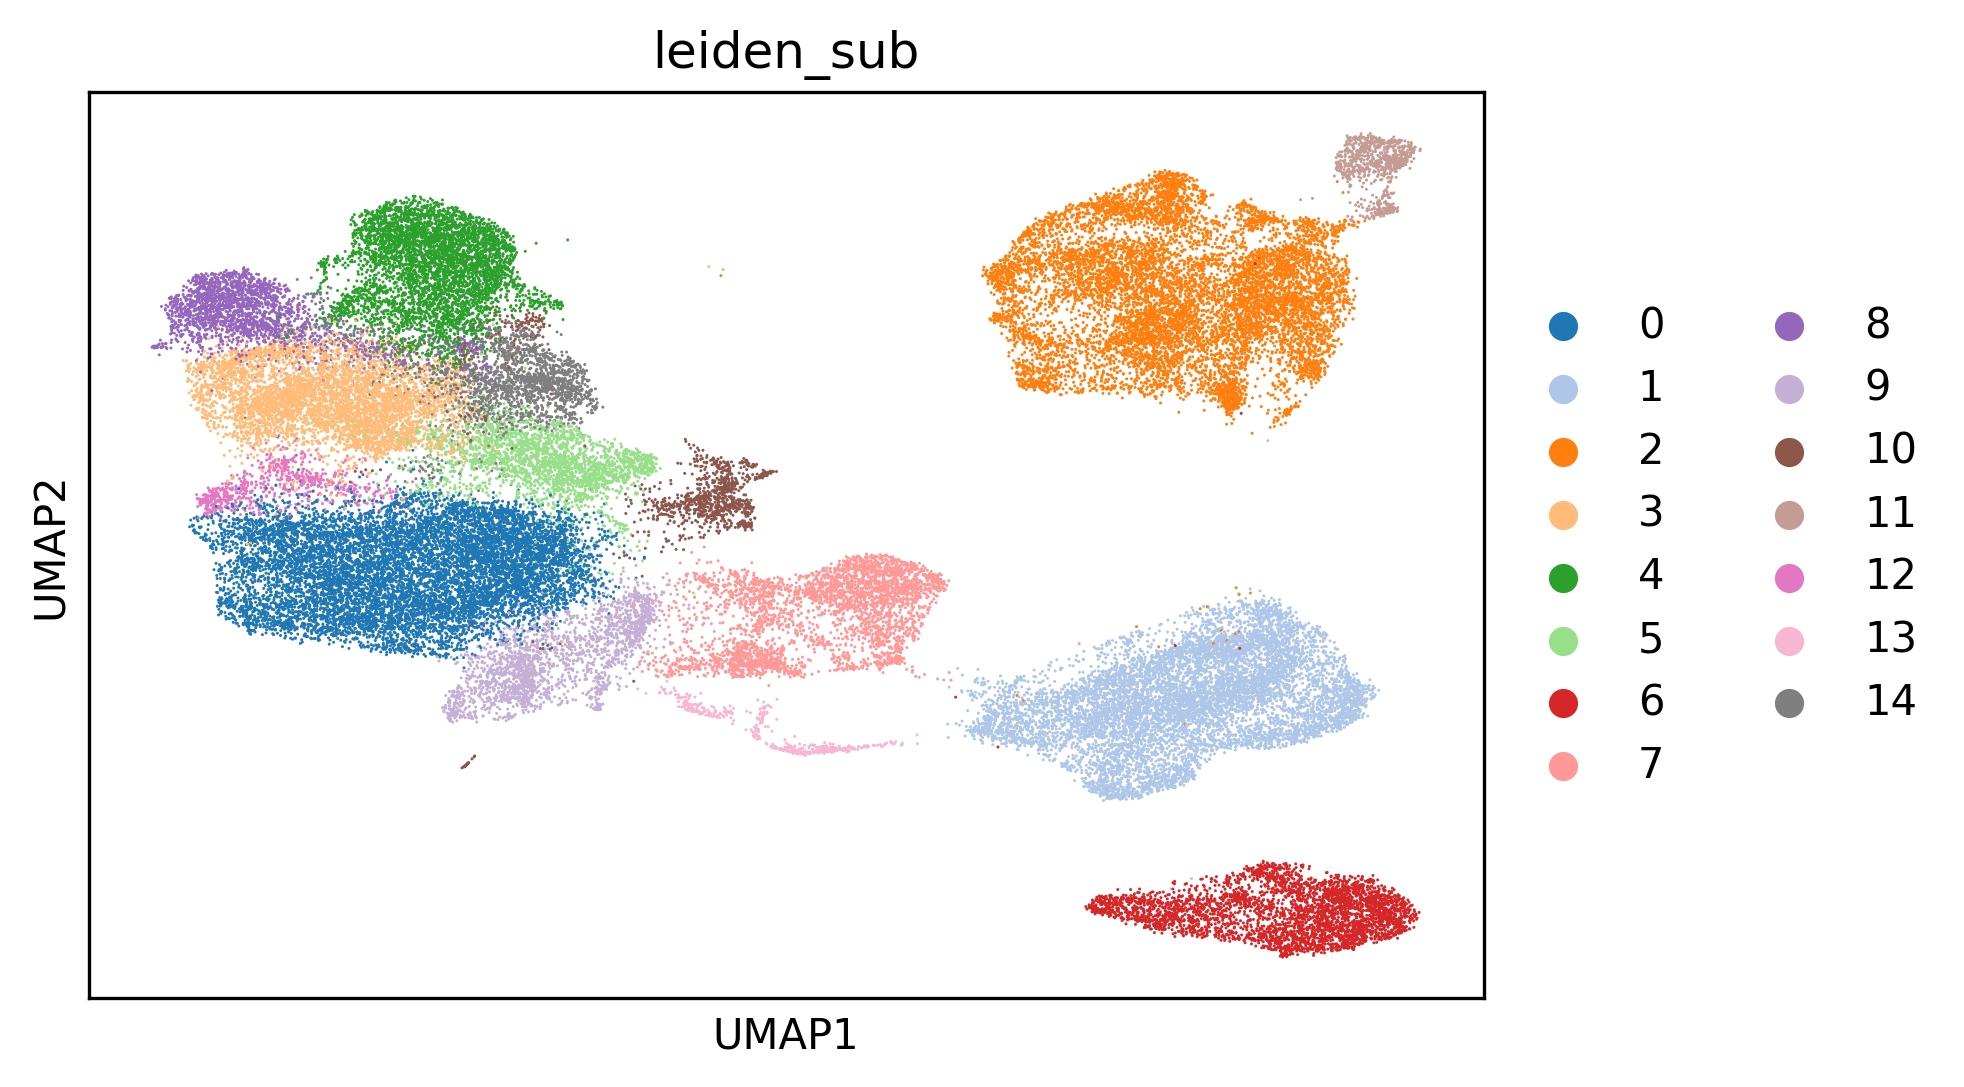

In [29]:
sc.pl.umap(adata, color='leiden_sub')

### Figure 3D, E

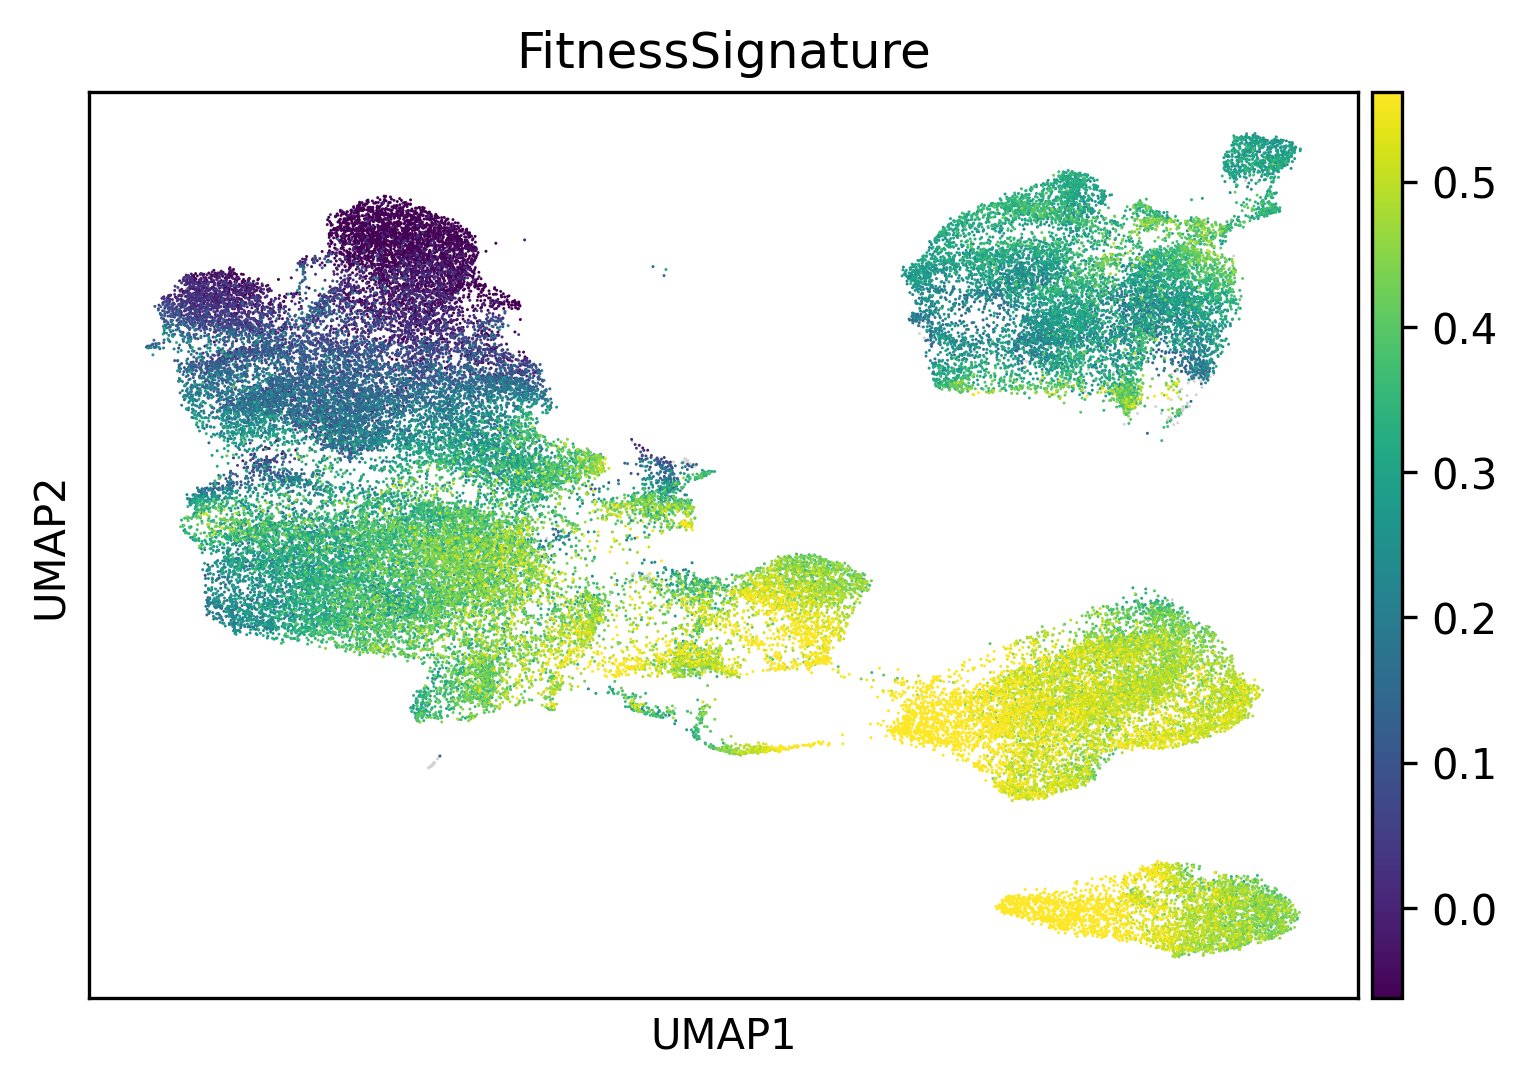

In [28]:
sc.pl.umap(adata, color='FitnessSignature', vmin='p5', vmax = 'p95')

Text(0.5, 1.0, 'Fitness Signature Score by Leiden Cluster')

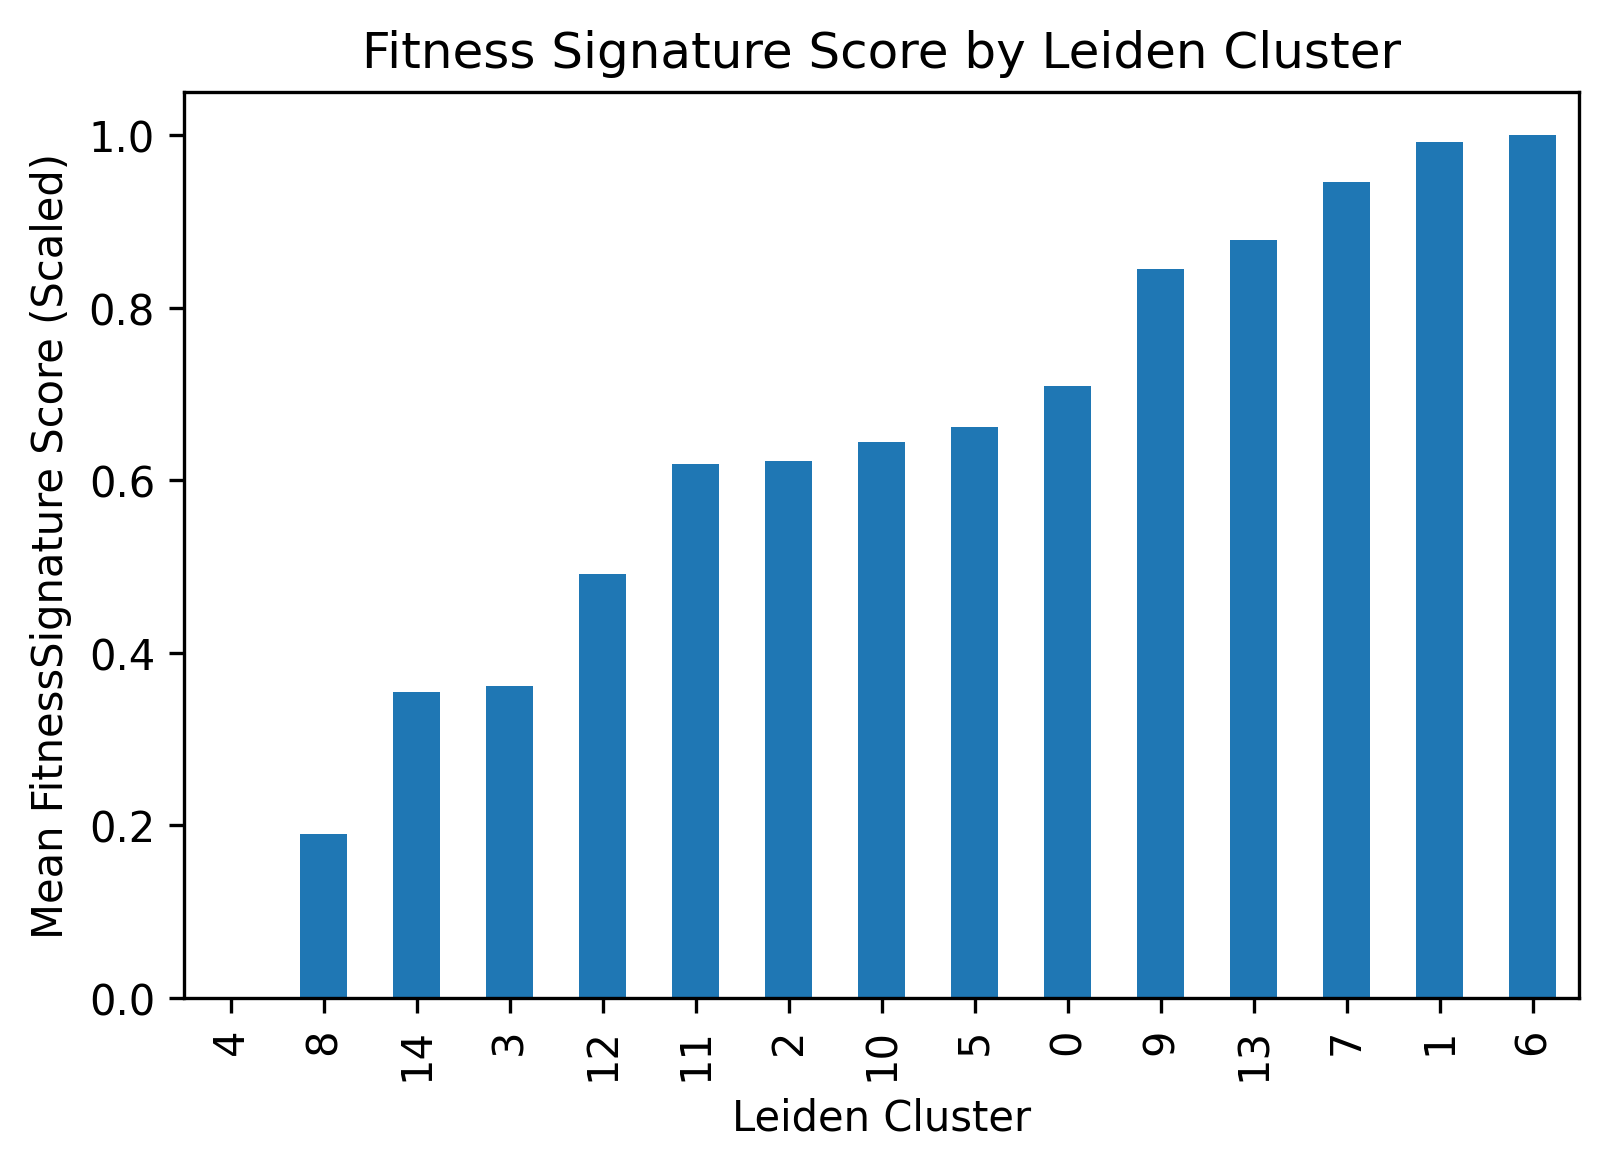

In [41]:
def zero_one_scale(values):
    
    _mi, _ma = np.min(values), np.max(values)
    
    normalized = (values - _mi) / (_ma - _mi)
    return normalized

adata.obs.groupby('leiden_sub').agg({'FitnessSignature': 'mean'}).apply(zero_one_scale).sort_values(by='FitnessSignature', ascending=True).plot(kind='bar', legend=None)
plt.xlabel("Leiden Cluster")
plt.ylabel("Mean FitnessSignature Score (Scaled)")
plt.title("Fitness Signature Score by Leiden Cluster")

### Figure S1A

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


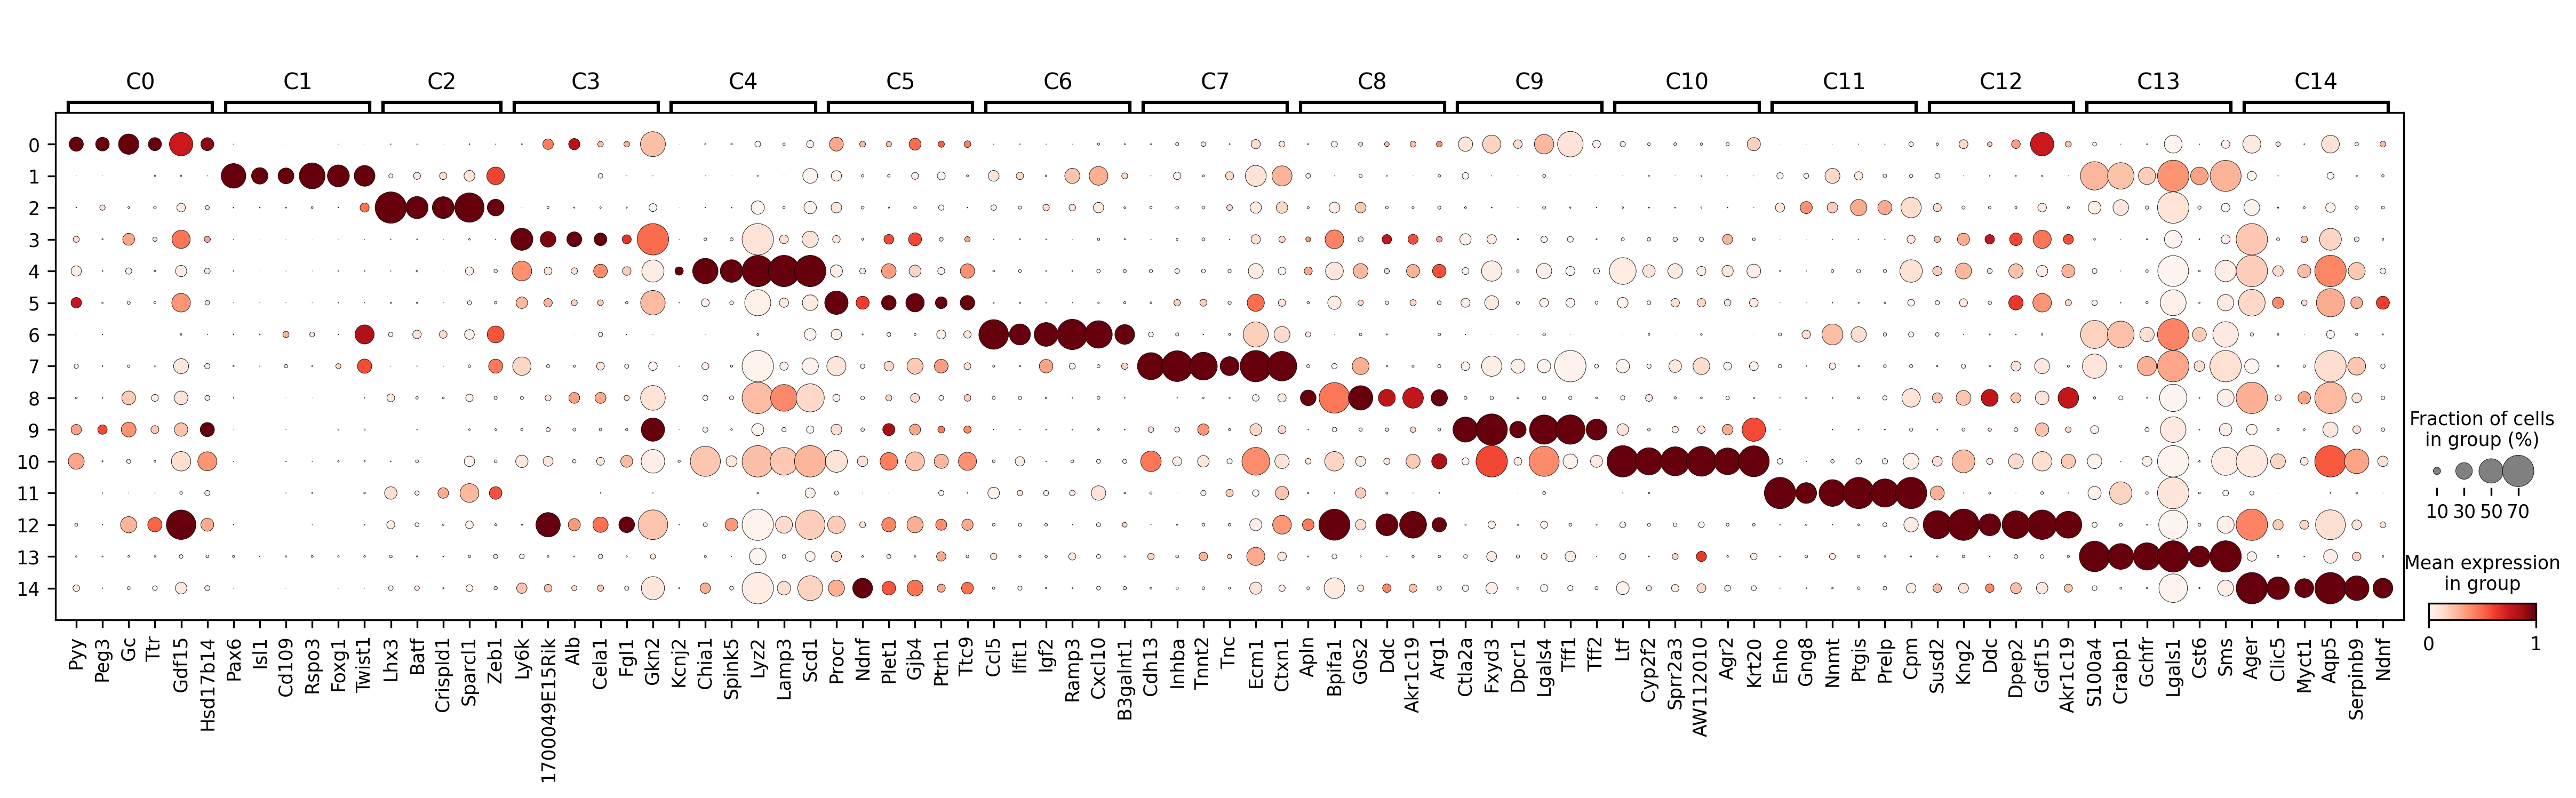

In [44]:
import scanpy as sc
markers = {
            'C0': ['Pyy', 'Peg3', 'Gc', 'Ttr', 'Gdf15', 'Hsd17b14'],
            'C1': ['Pax6', 'Isl1', 'Cd109', 'Rspo3', 'Foxg1', 'Twist1'], 
            'C2': ['Lhx3', 'Batf', 'Crispld1', 'Sparcl1', 'Zeb1'],
            'C3': ['Ly6k', '1700049E15Rik', 'Alb', 'Cela1','Fgl1', 'Gkn2'],
            'C4': ['Kcnj2', 'Chia1', 'Spink5', 'Lyz2', 'Lamp3', 'Scd1'],
            'C5': ['Procr', 'Ndnf', 'Plet1', 'Gjb4', 'Ptrh1', 'Ttc9'],
            'C6': ['Ccl5', 'Ifit1', 'Igf2', 'Ramp3', 'Cxcl10', 'B3galnt1'],
            'C7': ['Cdh13', 'Inhba', 'Tnnt2', 'Tnc', 'Ecm1', 'Ctxn1'],
            'C8': ['Apln', 'Bpifa1', 'G0s2', 'Ddc', 'Akr1c19', 'Arg1'],
            'C9': ['Ctla2a', 'Fxyd3', 'Dpcr1', 'Lgals4', 'Tff1', 'Tff2'],
            'C10': ['Ltf', 'Cyp2f2', 'Sprr2a3', 'AW112010', 'Agr2', 'Krt20'],
            'C11': ['Enho', 'Gng8', 'Nnmt', 'Ptgis', 'Prelp', 'Cpm'],
            'C12': ['Susd2', 'Kng2', 'Ddc', 'Dpep2', 'Gdf15', 'Akr1c19'],
            'C13': ['S100a4', 'Crabp1', 'Gchfr', 'Lgals1', 'Cst6', 'Sms'],
            'C14': ['Ager', 'Clic5', 'Myct1', 'Aqp5', 'Serpinb9', 'Ndnf']
          }

h = plt.figure(figsize=(20, 5))
ax = plt.gca()
sc.pl.dotplot(adata, var_names = markers, groupby='leiden_sub', standard_scale='var', ax=ax, dot_max=0.7, show=False)
plt.show()


## Figure S1E

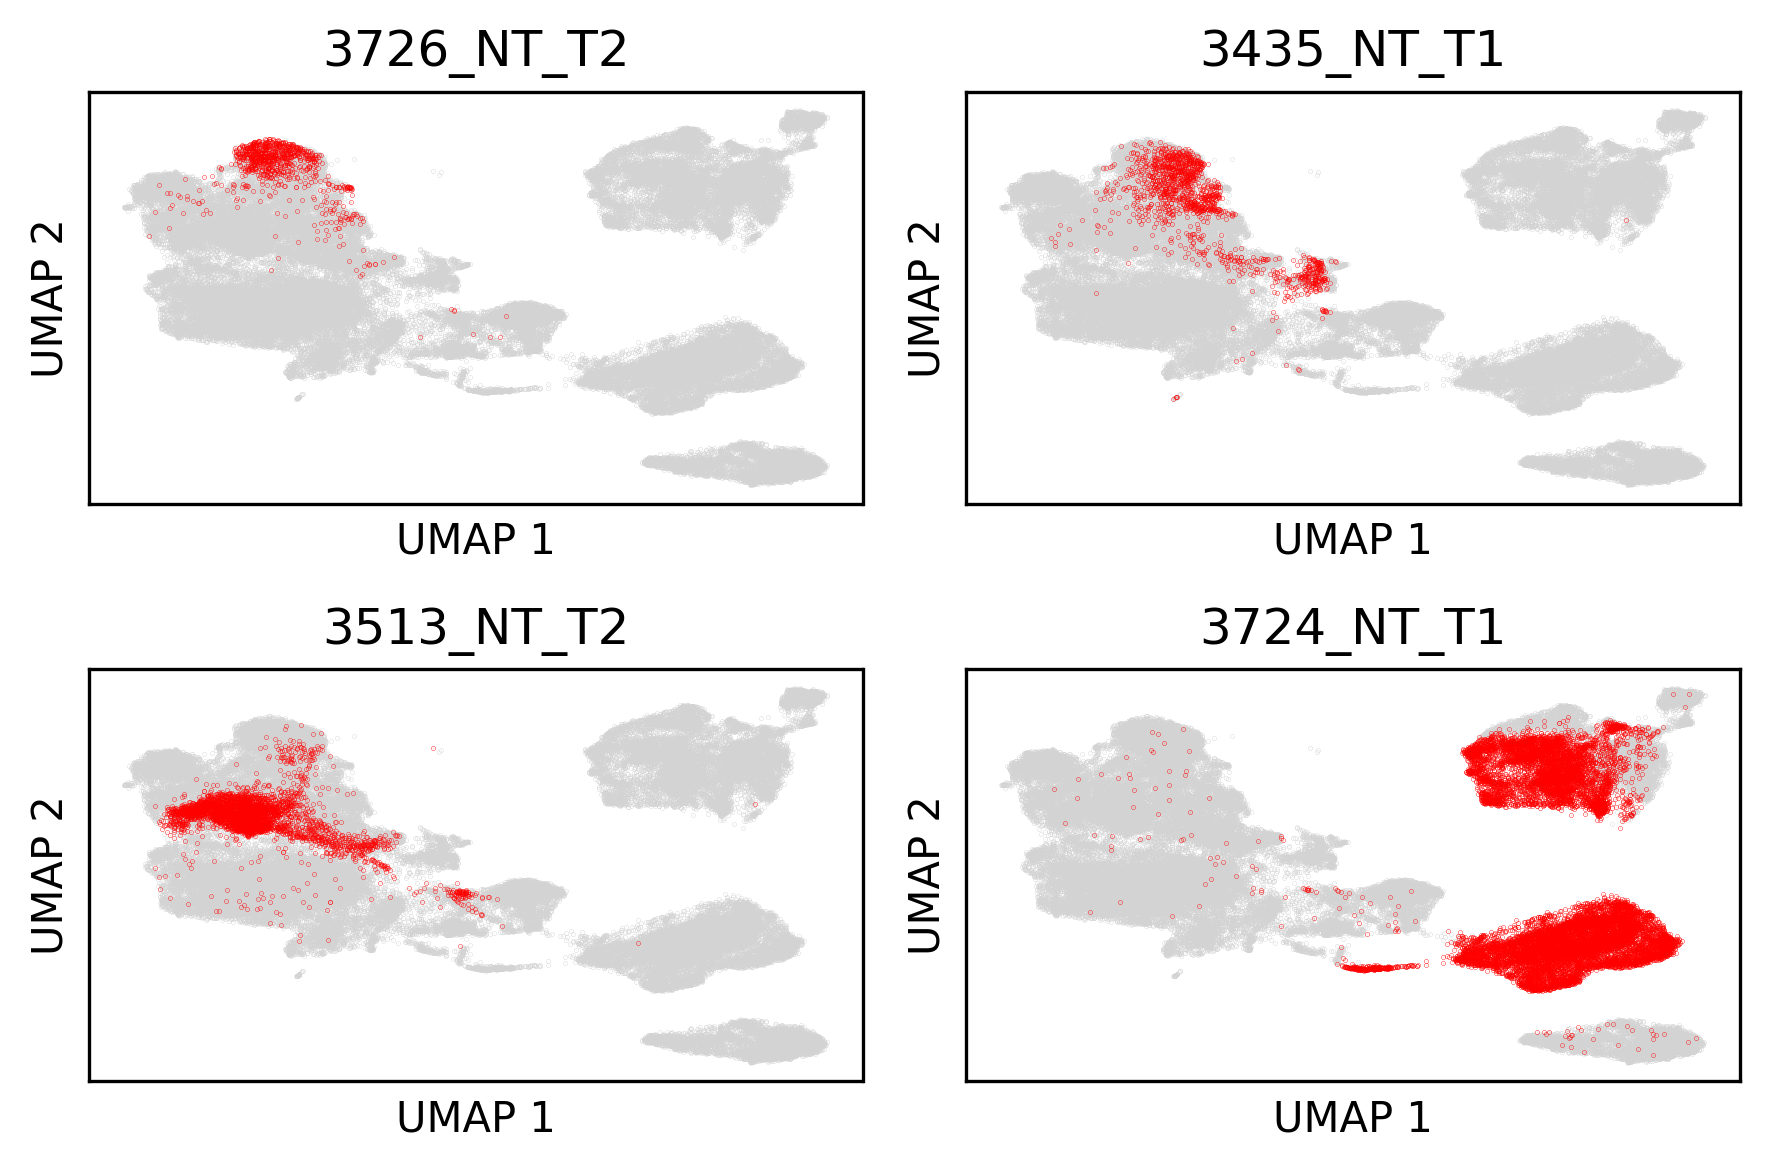

In [49]:
umap = pd.DataFrame(adata.obsm['X_umap'][:,:2], index = adata.obs_names, columns=['D1', 'D2'])

fig, axs = plt.subplots(2,2)
for ii, tumor in zip(range(4), ['3726_NT_T2', '3435_NT_T1', '3513_NT_T2', '3724_NT_T1']):
    
    row, col = ii // 2, ii % 2
    
    p1 = adata.obs[adata.obs['Tumor'] != tumor].index.values
    p2 = adata.obs[adata.obs['Tumor'] == tumor].index.values
    
    ax = axs[row, col]
    
    ax.scatter(umap.loc[p1, 'D1'], umap.loc[p1, 'D2'], c='lightgray', s=0.01, label='BG')
    ax.scatter(umap.loc[p2, 'D1'], umap.loc[p2, 'D2'], c='red', s=0.01, label=tumor)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel("UMAP 2")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.set_title(tumor)